In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

#My imports
import wrangle as w
import env as e
import os
import wrangle_mall as wm

In [4]:
#Get data
mall_df = wm.acquire_mall_customers()

In [5]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall_df['is_male'] = pd.get_dummies(mall_df['gender'], drop_first=True)['Male']

In [8]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score,is_male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [10]:
#Dropping gender
mall_df = mall_df.drop(columns=['gender'])

In [11]:
mall_df.head(2)

,customer_id,age,annual_income,spending_score,is_male
0,1,19,15,39,1
1,2,21,15,81,1


In [12]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     200 non-null    int64
 1   age             200 non-null    int64
 2   annual_income   200 non-null    int64
 3   spending_score  200 non-null    int64
 4   is_male         200 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB


In [13]:
mall_df.describe()

,customer_id,age,annual_income,spending_score,is_male
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20,0.44
std,57.88,13.97,26.26,25.82,0.50
min,1.00,18.00,15.00,1.00,0.00
25%,50.75,28.75,41.50,34.75,0.00
50%,100.50,36.00,61.50,50.00,0.00
75%,150.25,49.00,78.00,73.00,1.00
max,200.00,70.00,137.00,99.00,1.00


In [14]:
train, test, split = wm.train_validate_test_split(mall_df)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 95 to 43
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     139 non-null    int64
 1   age             139 non-null    int64
 2   annual_income   139 non-null    int64
 3   spending_score  139 non-null    int64
 4   is_male         139 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 5.6 KB


In [17]:
#Using age, annual income, and is_male to predict spending score

### 1. what is the distribution of each variable

array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'annual_income'}>,
        <AxesSubplot:title={'center':'spending_score'}>],
       [<AxesSubplot:title={'center':'is_male'}>, <AxesSubplot:>]],
      dtype=object)

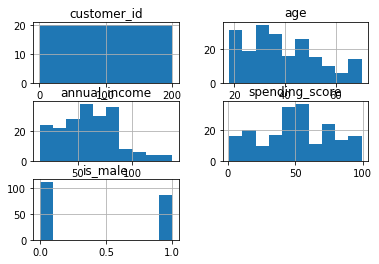

In [19]:
mall_df.hist()

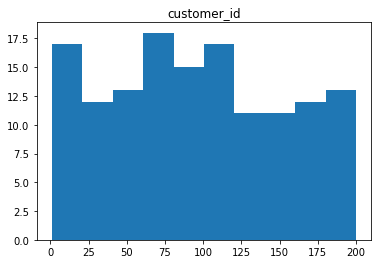

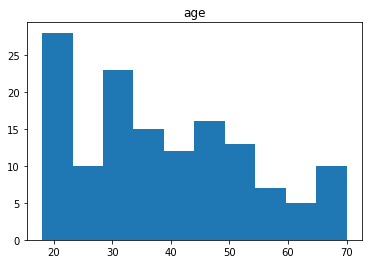

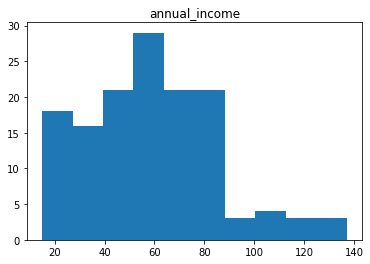

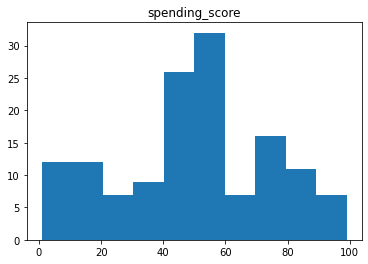

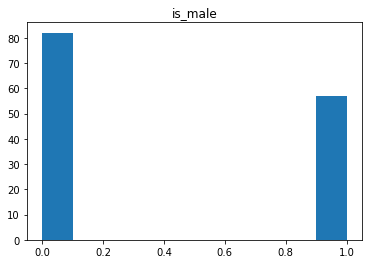

In [22]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()